In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Key Data Types**


Numeric:
    Data in numeric format.
    Continous
        - Float, Decimal or Interval;
    Discrete
        - Integer, Count.
        
Categorical:
    Data that can take only a set of values
    Binary
        - Logical, Boolean;
    Ordinal
        - Explicit ordering(orderes Factors).
        

In [2]:
dft = pd.DataFrame(
    {
        "A": np.random.rand(3),
        "B": 1,
        "C": "foo",
        "D": pd.Timestamp("20010102"),
        "E": pd.Series([1.0] * 3).astype("float32"),
        "F": False,
        "G": pd.Series([1] * 3, dtype="int8"),
    }
)
dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
dtype: object

In [3]:
#reindex-like data type:

df1 = pd.DataFrame(np.random.randn(8, 1), columns=["A"], dtype="float32")


df2 = pd.DataFrame(
    {
        "A": pd.Series(np.random.randn(8), dtype="float16"),
        "B": pd.Series(np.random.randn(8)),
        "C": pd.Series(np.random.randint(0, 255, size=8), dtype="uint8"),
    }
)
df3 = df1.reindex_like(df2).fillna(value=0.0) + df2


df2.dtypes


A    float16
B    float64
C      uint8
dtype: object

In [4]:
df3.dtypes

A    float32
B    float64
C    float64
dtype: object

In [5]:
#astype

df3.astype("float32").dtypes

A    float32
B    float32
C    float32
dtype: object

In [6]:

#Scikit learn supports Ordinal data with

from sklearn.preprocessing import OrdinalEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:

dfnew = pd.DataFrame(
    {
        'No': (1,2,3,4,5,6),
        'Name': ('tom','ram','jany','rach','joey','peter'),
        'S': ('M','F','o','M','F','M'),
        'Blood':('a','b','o','o','b','b'),
        'Grade':('A','A','B','A','B','D'),
        'Height':(123,123,123,154,154,154),
        'Study':('Maths','Social','Maths','Social','Maths','Social')
    })
        



enc = OrdinalEncoder()
enc.fit(dfnew[["S","Blood", "Grade","Study"]])
dfnew[["S","Blood","Grade","Study"]] = enc.transform(dfnew[["S","Blood","Grade","Study"]])

In [8]:
dfnew

,No,Name,S,Blood,Grade,Height,Study
0,1,tom,1.0,0.0,0.0,123,0.0
1,2,ram,0.0,1.0,0.0,123,1.0
2,3,jany,2.0,2.0,1.0,123,0.0
3,4,rach,1.0,2.0,0.0,154,1.0
4,5,joey,0.0,1.0,1.0,154,0.0
5,6,peter,1.0,1.0,2.0,154,1.0


In [9]:
!pip install wquantiles

In [10]:
#Mean

dfnew['Height'].mean()
dfnew['Height'].median()

from scipy.stats import trim_mean
trim_mean(dfnew['Height'],0.1)

import wquantiles
np.average(dfnew['Height'],weights=dfnew['No'])
wquantiles.median(dfnew['Height'],weights=dfnew['No'])




154.0

In [11]:
#percentiles



dfnew['Height'].quantile([0.05,0.25,0.5,0.75])

0.05    123.0
0.25    123.0
0.50    138.5
0.75    154.0
Name: Height, dtype: float64

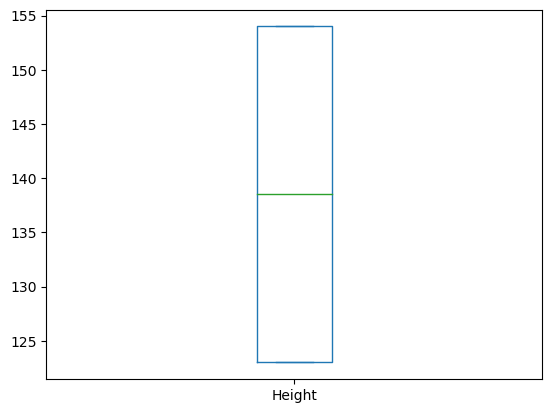

In [12]:
#Boxplots

ax = dfnew['Height'].plot.box()
ax.set_label('Heights')

In [13]:
#Frequency table


binnedheights = pd.cut(dfnew['Height'],3)
binnedheights.value_counts()

(122.969, 133.333]    3
(143.667, 154.0]      3
(133.333, 143.667]    0
Name: Height, dtype: int64

Text(0.5, 0, 'heights')

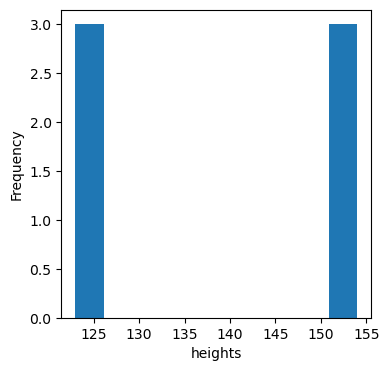

In [14]:
ax = (dfnew['Height'].plot.hist(figsize=(4,4)))
ax.set_xlabel('heights')

/opt/conda/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'Height')

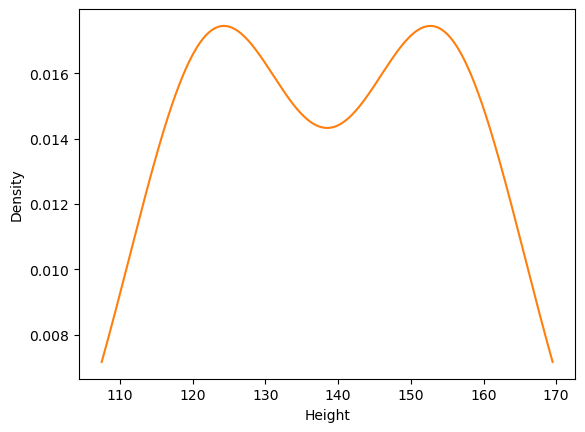

In [15]:
#Desity plots

ax = dfnew['Height'].plot.hist(density=True,bins=range(1,3))
dfnew['Height'].plot.density(ax=ax)
ax.set_xlabel('Height')

In [16]:
#etfs <- sp500_px[row.names(sp500_px)>'2012-07-01', sp500_sym[sp500_sym$sector == 'etf','symbol']]

#First queue

In [17]:
#barplot(as.matrix(dfw)) / 6, cex.axis= 0.8, cex.name=0.7,xlab='Cause of delay',ylab='Count')

#ax.dwf.transpose().plot.bar(figsize=(4,4),legend=False)
#ax.set_xlabel('Count')